## IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
df=pd.read_csv("C:/Users/saish.mohare/Desktop/Loan predictor python/train.csv")

In [3]:
df.head(10) 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


## SUMMARY OF NUMERICAL FIELDS

In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# ANALYSIS OF ABOVE DESCRIPTION

1. There are **22**(614-592) missing values in LoanAmount
2. **14** missing values in Loan_Amount_Term
3. **50** missing values in Credit_History 
4. **84%** of loan seekers have a credit history(the mean is 0.84 for 0s and 1s)

## SUMMARY OF NON-NUMERICAL DATA

In [5]:
print(df['Property_Area'].value_counts())


Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


In [6]:
print(df['Gender'].value_counts())


Male      489
Female    112
Name: Gender, dtype: int64


In [7]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [8]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [9]:
df['Dependents'].value_counts()


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [10]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

## DISTRIBUTION ANALYSIS

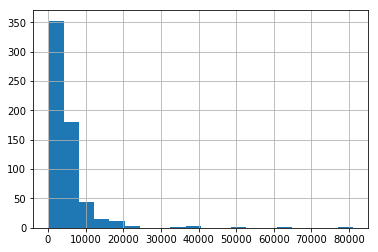

In [11]:
df['ApplicantIncome'].hist(bins=20)
plt.show()

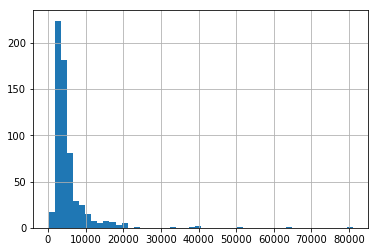

In [12]:
df['ApplicantIncome'].hist(bins=50)
plt.show()

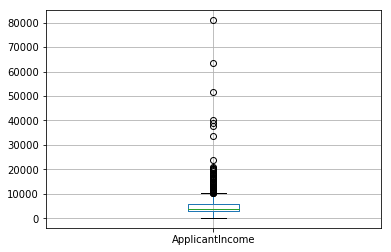

In [13]:
df.boxplot(column='ApplicantIncome')
plt.show()

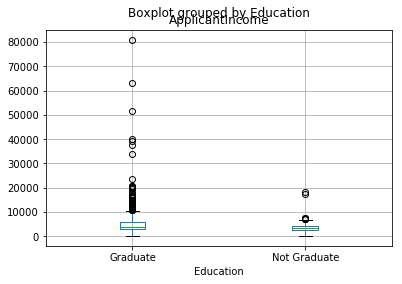

In [14]:
df.boxplot(column='ApplicantIncome',by='Education')
plt.show()

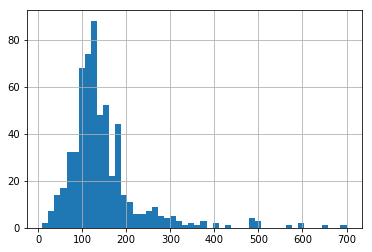

In [15]:
df['LoanAmount'].hist(bins=50)
plt.show()

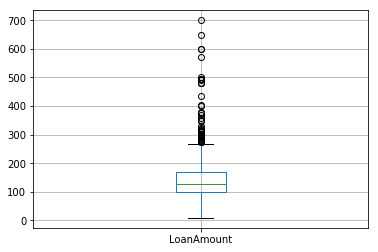

In [16]:
df.boxplot(column='LoanAmount')
plt.show()

## ANALYSIS OF ABOVE GRAPHS

1. From the histogram and boxplots of ApplicantIncome and LoanAmount we can infer that both have outliers
2. The ApplicantIncome of Graduates have more number of outliers than their counterparts though their mean is approximately same


## CATEGORICAL VARIABLE ANALYSIS

In [17]:
df['Credit_History'].value_counts(ascending=True)

0.0     89
1.0    475
Name: Credit_History, dtype: int64

In [18]:
df['Credit_History'].value_counts(normalize=True,ascending=True)

0.0    0.157801
1.0    0.842199
Name: Credit_History, dtype: float64

### INFLUENCE OF CREDIT HISTORY ON LOAN STATUS

In [19]:
temp = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x:
x.map({'Y':1,'N':0}).mean())

print("Probability of getting loan for each credit history class : ")
print(temp)

Probability of getting loan for each credit history class : 
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


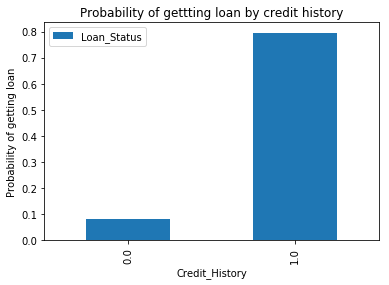

In [20]:
fig=plt.figure()

ax1=temp.plot(kind='bar')
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Probability of getting loan')
ax1.set_title('Probability of gettting loan by credit history')

plt.show()

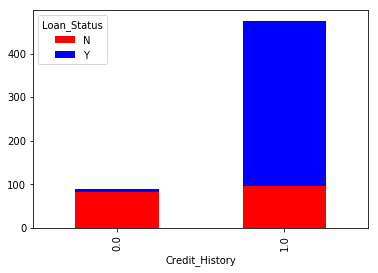

In [23]:
temp2=pd.crosstab(df['Credit_History'],df['Loan_Status'])
temp2.plot(kind='bar',stacked=True,color=['red','blue'],grid=False)
plt.show()

### INFLUENCE OF GENDER ON LOAN STATUS


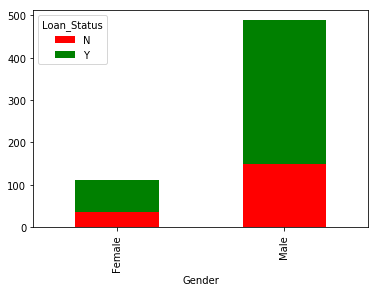

In [25]:
temp3=pd.crosstab(df['Gender'],df['Loan_Status'])
temp3.plot(kind='bar',stacked=True,color=['red','green'],grid=False)
plt.show()

Probability of getting loan for each Gender class : 
        Loan_Status
Gender             
Female     0.669643
Male       0.693252


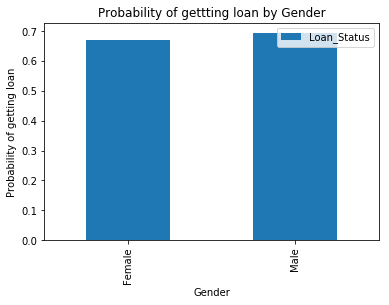

In [27]:
temp4 = df.pivot_table(values='Loan_Status',index=['Gender'],aggfunc=lambda x:
x.map({'Y':1,'N':0}).mean())

print("Probability of getting loan for each Gender class : ")
print(temp4)

fig=plt.figure()

ax1=temp4.plot(kind='bar')
ax1.set_xlabel('Gender')
ax1.set_ylabel('Probability of getting loan')
ax1.set_title('Probability of gettting loan by Gender')

plt.show()

### INFLUENCE OF MARTIAL STATUS ON LOAN STATUS

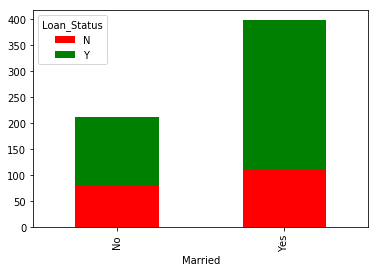

In [28]:
temp5=pd.crosstab(df['Married'],df['Loan_Status'])
temp5.plot(kind='bar',stacked=True,color=['red','green'],grid=False)
plt.show()

Probability of getting loan for each Gender class : 
         Loan_Status
Married             
No          0.629108
Yes         0.716080


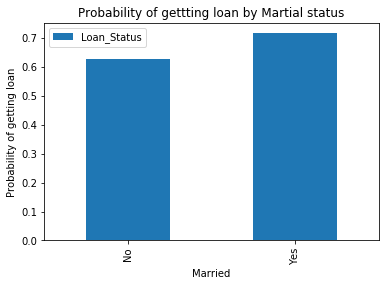

In [30]:
temp6 = df.pivot_table(values='Loan_Status',index=['Married'],aggfunc=lambda x:
x.map({'Y':1,'N':0}).mean())

print("Probability of getting loan for each Gender class : ")
print(temp6)

fig=plt.figure()

ax1=temp6.plot(kind='bar')
ax1.set_xlabel('Married')
ax1.set_ylabel('Probability of getting loan')
ax1.set_title('Probability of gettting loan by Martial status')

plt.show()

### INFUENCE OF DEPENDENTS ON LOAN STATUS

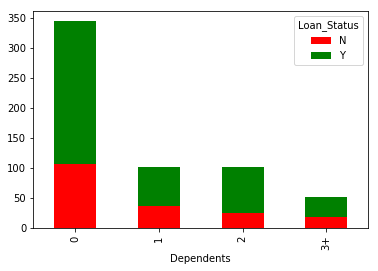

In [32]:
temp7=pd.crosstab(df['Dependents'],df['Loan_Status'])
temp7.plot(kind='bar',stacked=True,color=['red','green'],grid=False)
plt.show()

Probability of getting loan for each Gender class : 
            Loan_Status
Dependents             
0              0.689855
1              0.647059
2              0.752475
3+             0.647059


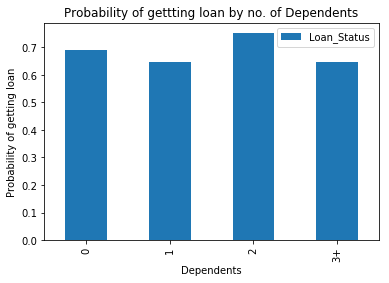

In [33]:
temp8 = df.pivot_table(values='Loan_Status',index=['Dependents'],aggfunc=lambda x:
x.map({'Y':1,'N':0}).mean())

print("Probability of getting loan for each Gender class : ")
print(temp8)

fig=plt.figure()

ax1=temp8.plot(kind='bar')
ax1.set_xlabel('Dependents')
ax1.set_ylabel('Probability of getting loan')
ax1.set_title('Probability of gettting loan by no. of Dependents')

plt.show()

### INFLUENCE OF EDUCATION ON LOAN STATUS

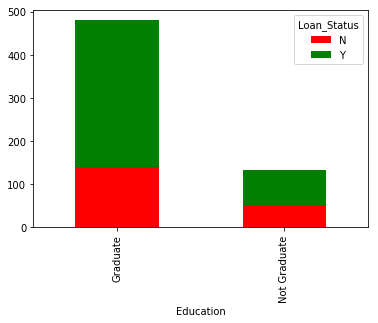

In [34]:
temp9=pd.crosstab(df['Education'],df['Loan_Status'])
temp9.plot(kind='bar',stacked=True,color=['red','green'],grid=False)
plt.show()

Probability of getting loan by Education : 
              Loan_Status
Education                
Graduate         0.708333
Not Graduate     0.611940


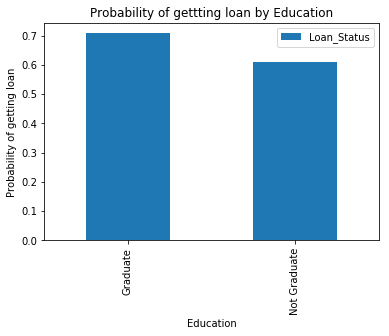

In [36]:
temp10 = df.pivot_table(values='Loan_Status',index=['Education'],aggfunc=lambda x:
x.map({'Y':1,'N':0}).mean())

print("Probability of getting loan by Education : ")
print(temp10)

fig=plt.figure()

ax1=temp10.plot(kind='bar')
ax1.set_xlabel('Education')
ax1.set_ylabel('Probability of getting loan')
ax1.set_title('Probability of gettting loan by Education')

plt.show()

### INFLUENCE OF EMPLOYMENT STATUS ON LOAN STATUS

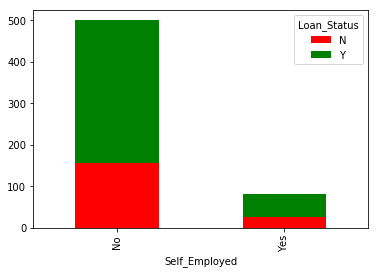

In [38]:
temp11=pd.crosstab(df['Self_Employed'],df['Loan_Status'])
temp11.plot(kind='bar',stacked=True,color=['red','green'],grid=False)
plt.show()

Probability of getting loan by Employment : 
               Loan_Status
Self_Employed             
No                0.686000
Yes               0.682927


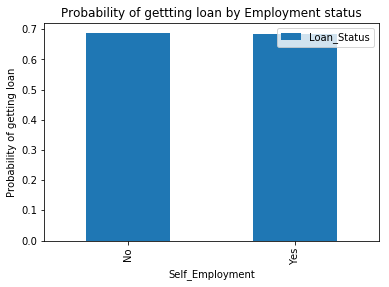

In [39]:
temp12 = df.pivot_table(values='Loan_Status',index=['Self_Employed'],aggfunc=lambda x:
x.map({'Y':1,'N':0}).mean())

print("Probability of getting loan by Employment : ")
print(temp12)

fig=plt.figure()

ax1=temp12.plot(kind='bar')
ax1.set_xlabel('Self_Employment')
ax1.set_ylabel('Probability of getting loan')
ax1.set_title('Probability of gettting loan by Employment status')

plt.show()

### INFLUENCE OF PROPERTY TYPE ON LOAN STATUS

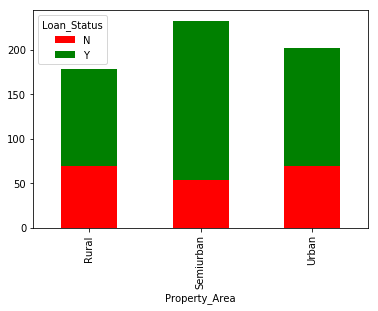

In [41]:
temp13=pd.crosstab(df['Property_Area'],df['Loan_Status'])
temp13.plot(kind='bar',stacked=True,color=['red','green'],grid=False)
plt.show()

Probability of getting loan by Property area : 
               Loan_Status
Property_Area             
Rural             0.614525
Semiurban         0.768240
Urban             0.658416


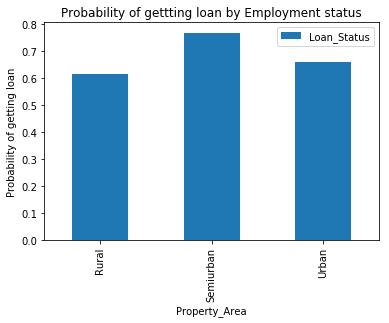

In [42]:
temp14 = df.pivot_table(values='Loan_Status',index=['Property_Area'],aggfunc=lambda x:
x.map({'Y':1,'N':0}).mean())

print("Probability of getting loan by Property area : ")
print(temp14)

fig=plt.figure()

ax1=temp14.plot(kind='bar')
ax1.set_xlabel('Property_Area')
ax1.set_ylabel('Probability of getting loan')
ax1.set_title('Probability of gettting loan by Employment status')

plt.show()

# DATA MUNGING

### LET US FIND OUT THE MISSING VALUES IN EACH ROW

In [43]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64